In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [3]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image



In [8]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8s.pt conf=0.35 source='/content/drive/MyDrive/Projectyolo/projectyolodataset/train/images'

/content
2024-08-07 16:51:44.622517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 16:51:44.640688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 16:51:44.646790: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 16:51:45.902189: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/993 /content

In [6]:
# %cd {HOME}
# Image(filename='runs/detect/predict/.results.png', height=600)

In [9]:

model = YOLO(f'{HOME}/yolov8s.pt')
results = model.predict(source='/content/drive/MyDrive/Projectyolo/projectyolodataset/train/images', conf=0.35)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs


In [10]:
results[0].boxes.xyxy

tensor([[152., 253., 447., 500.],
        [522., 234., 640., 349.]], device='cuda:0')

In [11]:
results[0].boxes.conf

tensor([0.93785, 0.91974], device='cuda:0')

In [12]:

results[0].boxes.cls

tensor([2., 2.], device='cuda:0')

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd /content/drive/MyDrive/Projectyolo

/content/drive/MyDrive/Projectyolo


In [15]:
%cd /content/drive/MyDrive/Projectyolo
!yolo task=detect mode=train model=yolov8s.pt data= /content/drive/MyDrive/Projectyolo/datayolo.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Projectyolo
100% 21.5M/21.5M [00:00<00:00, 213MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Projectyolo/datayolo.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tr

In [16]:
!ls runs/detect/train/

args.yaml					     results.png	    val_batch0_pred.jpg
confusion_matrix.png				     train_batch0.jpg	    val_batch1_labels.jpg
events.out.tfevents.1723050140.d3ea30ff4093.10073.0  train_batch1.jpg	    val_batch1_pred.jpg
F1_curve.png					     train_batch2.jpg	    val_batch2_labels.jpg
P_curve.png					     train_batch945.jpg     val_batch2_pred.jpg
PR_curve.png					     train_batch946.jpg     weights
R_curve.png					     train_batch947.jpg
results.csv					     val_batch0_labels.jpg


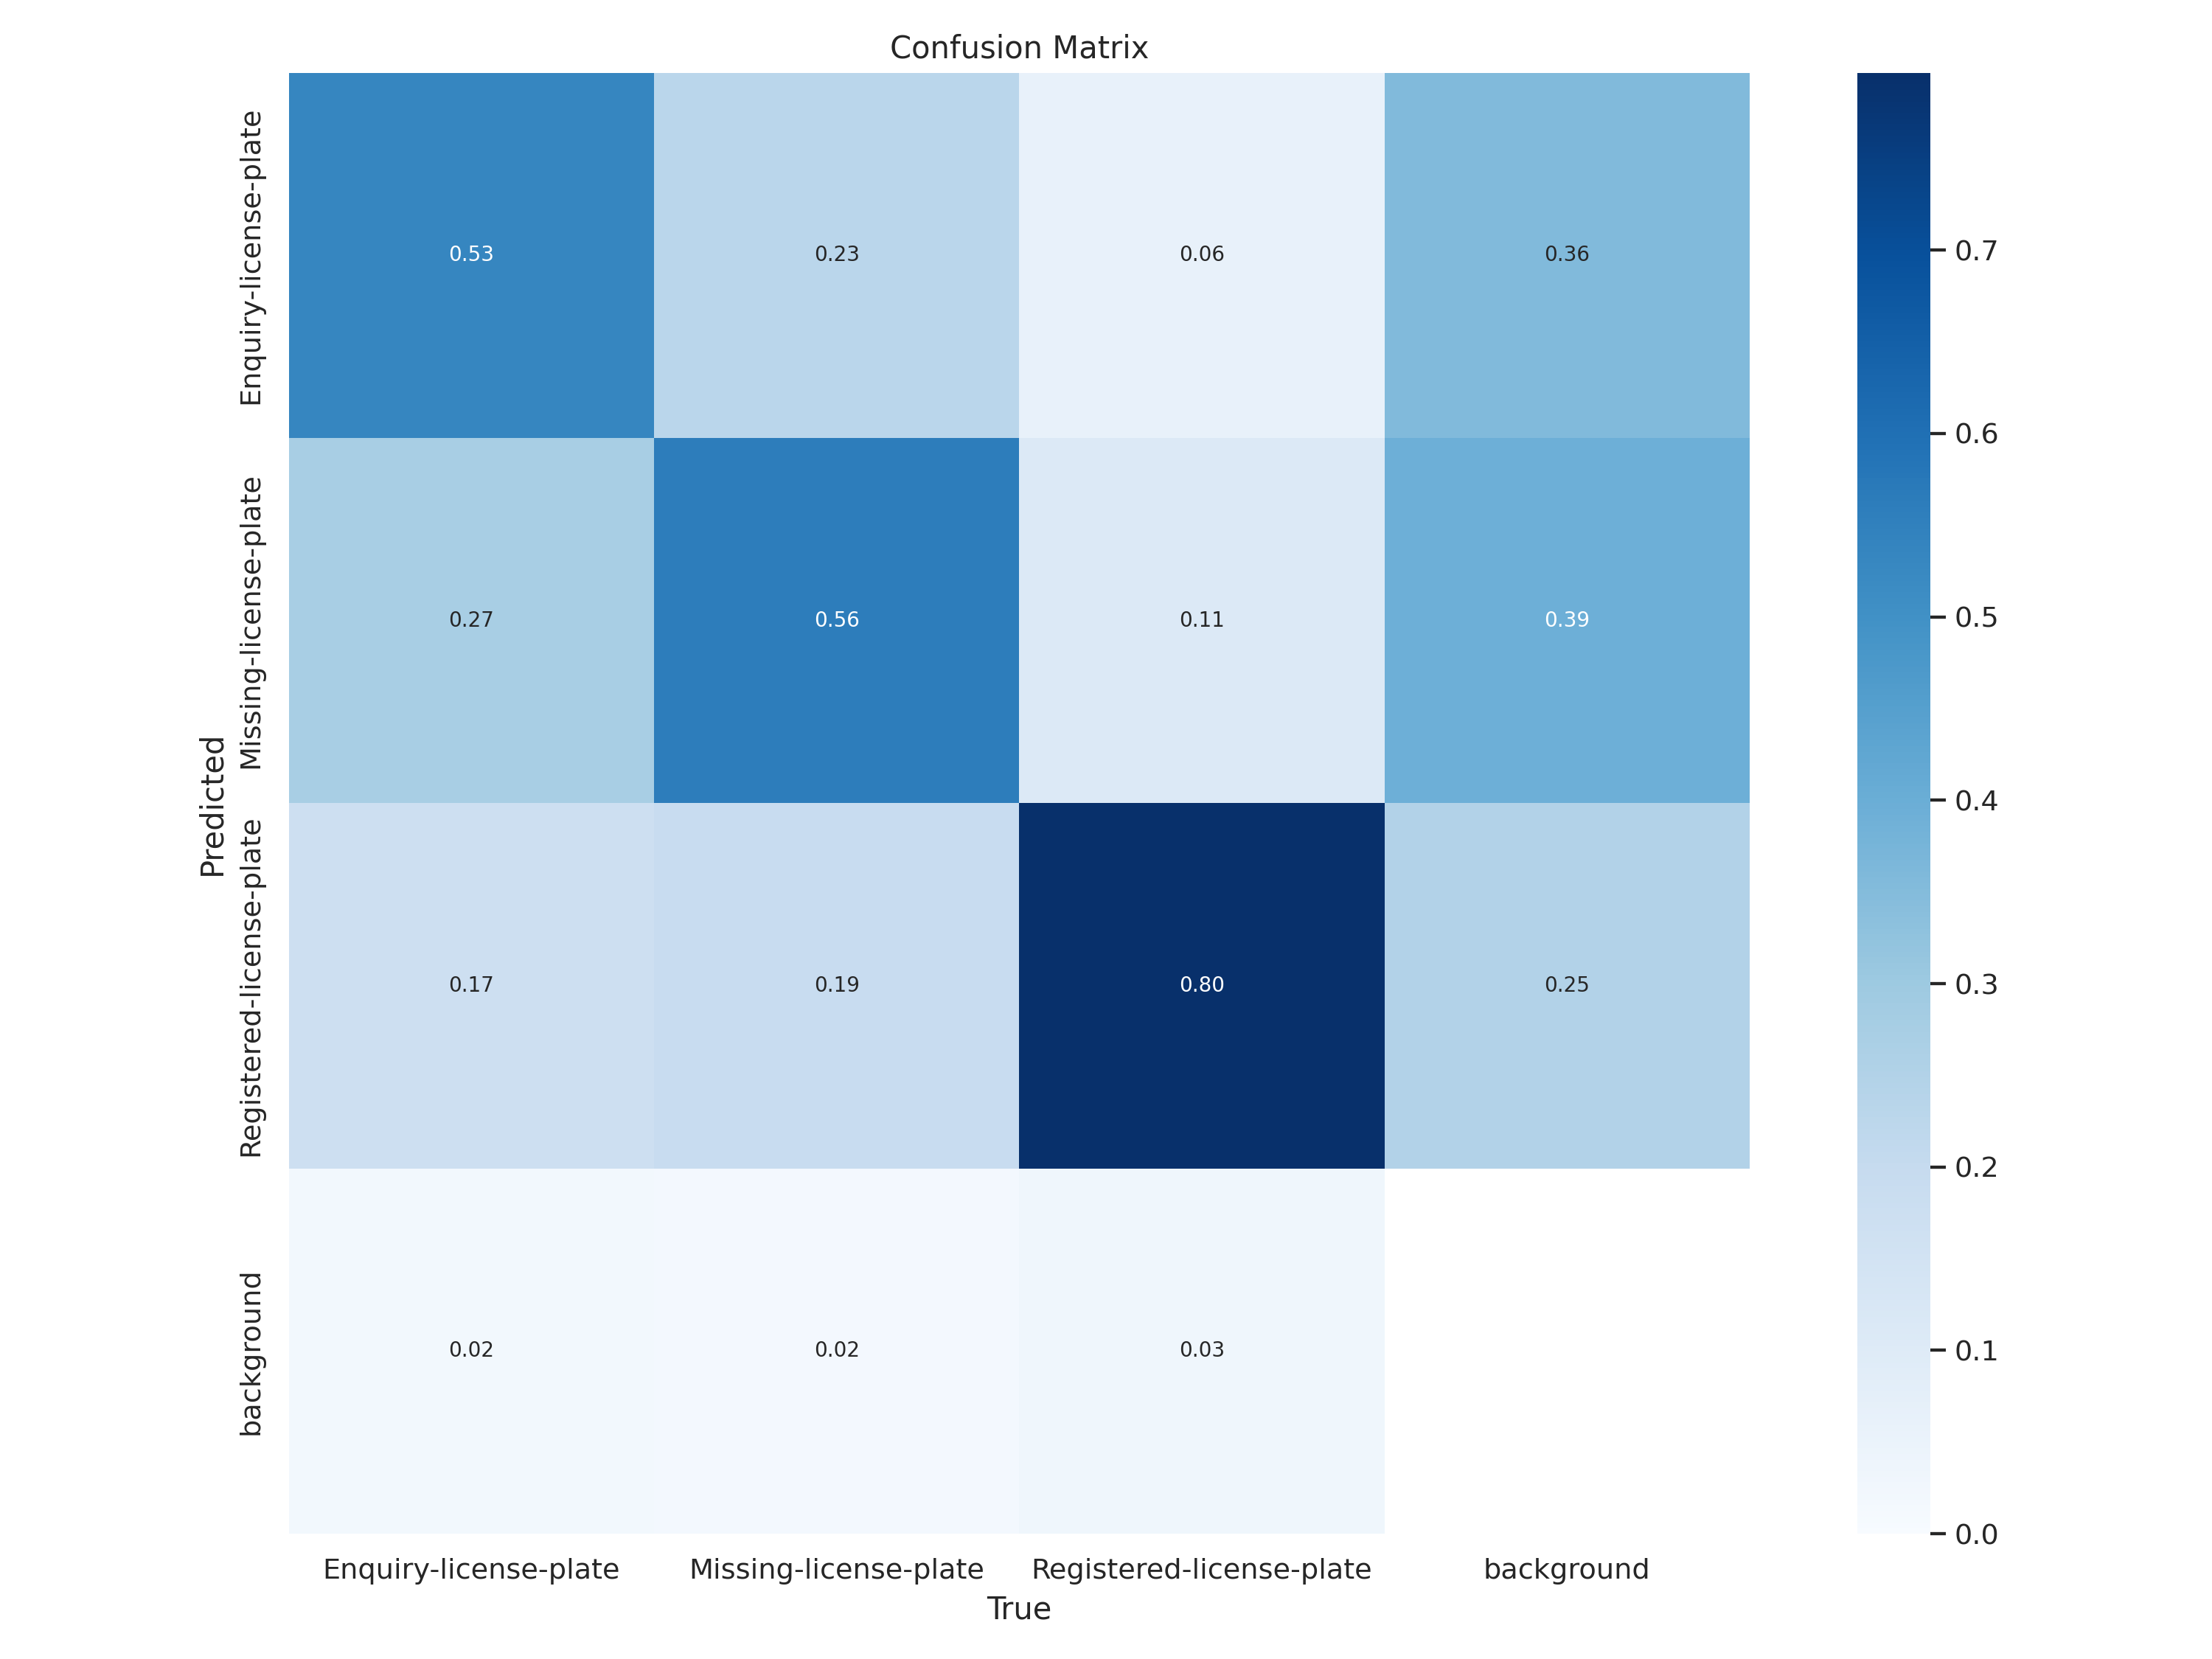

In [17]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

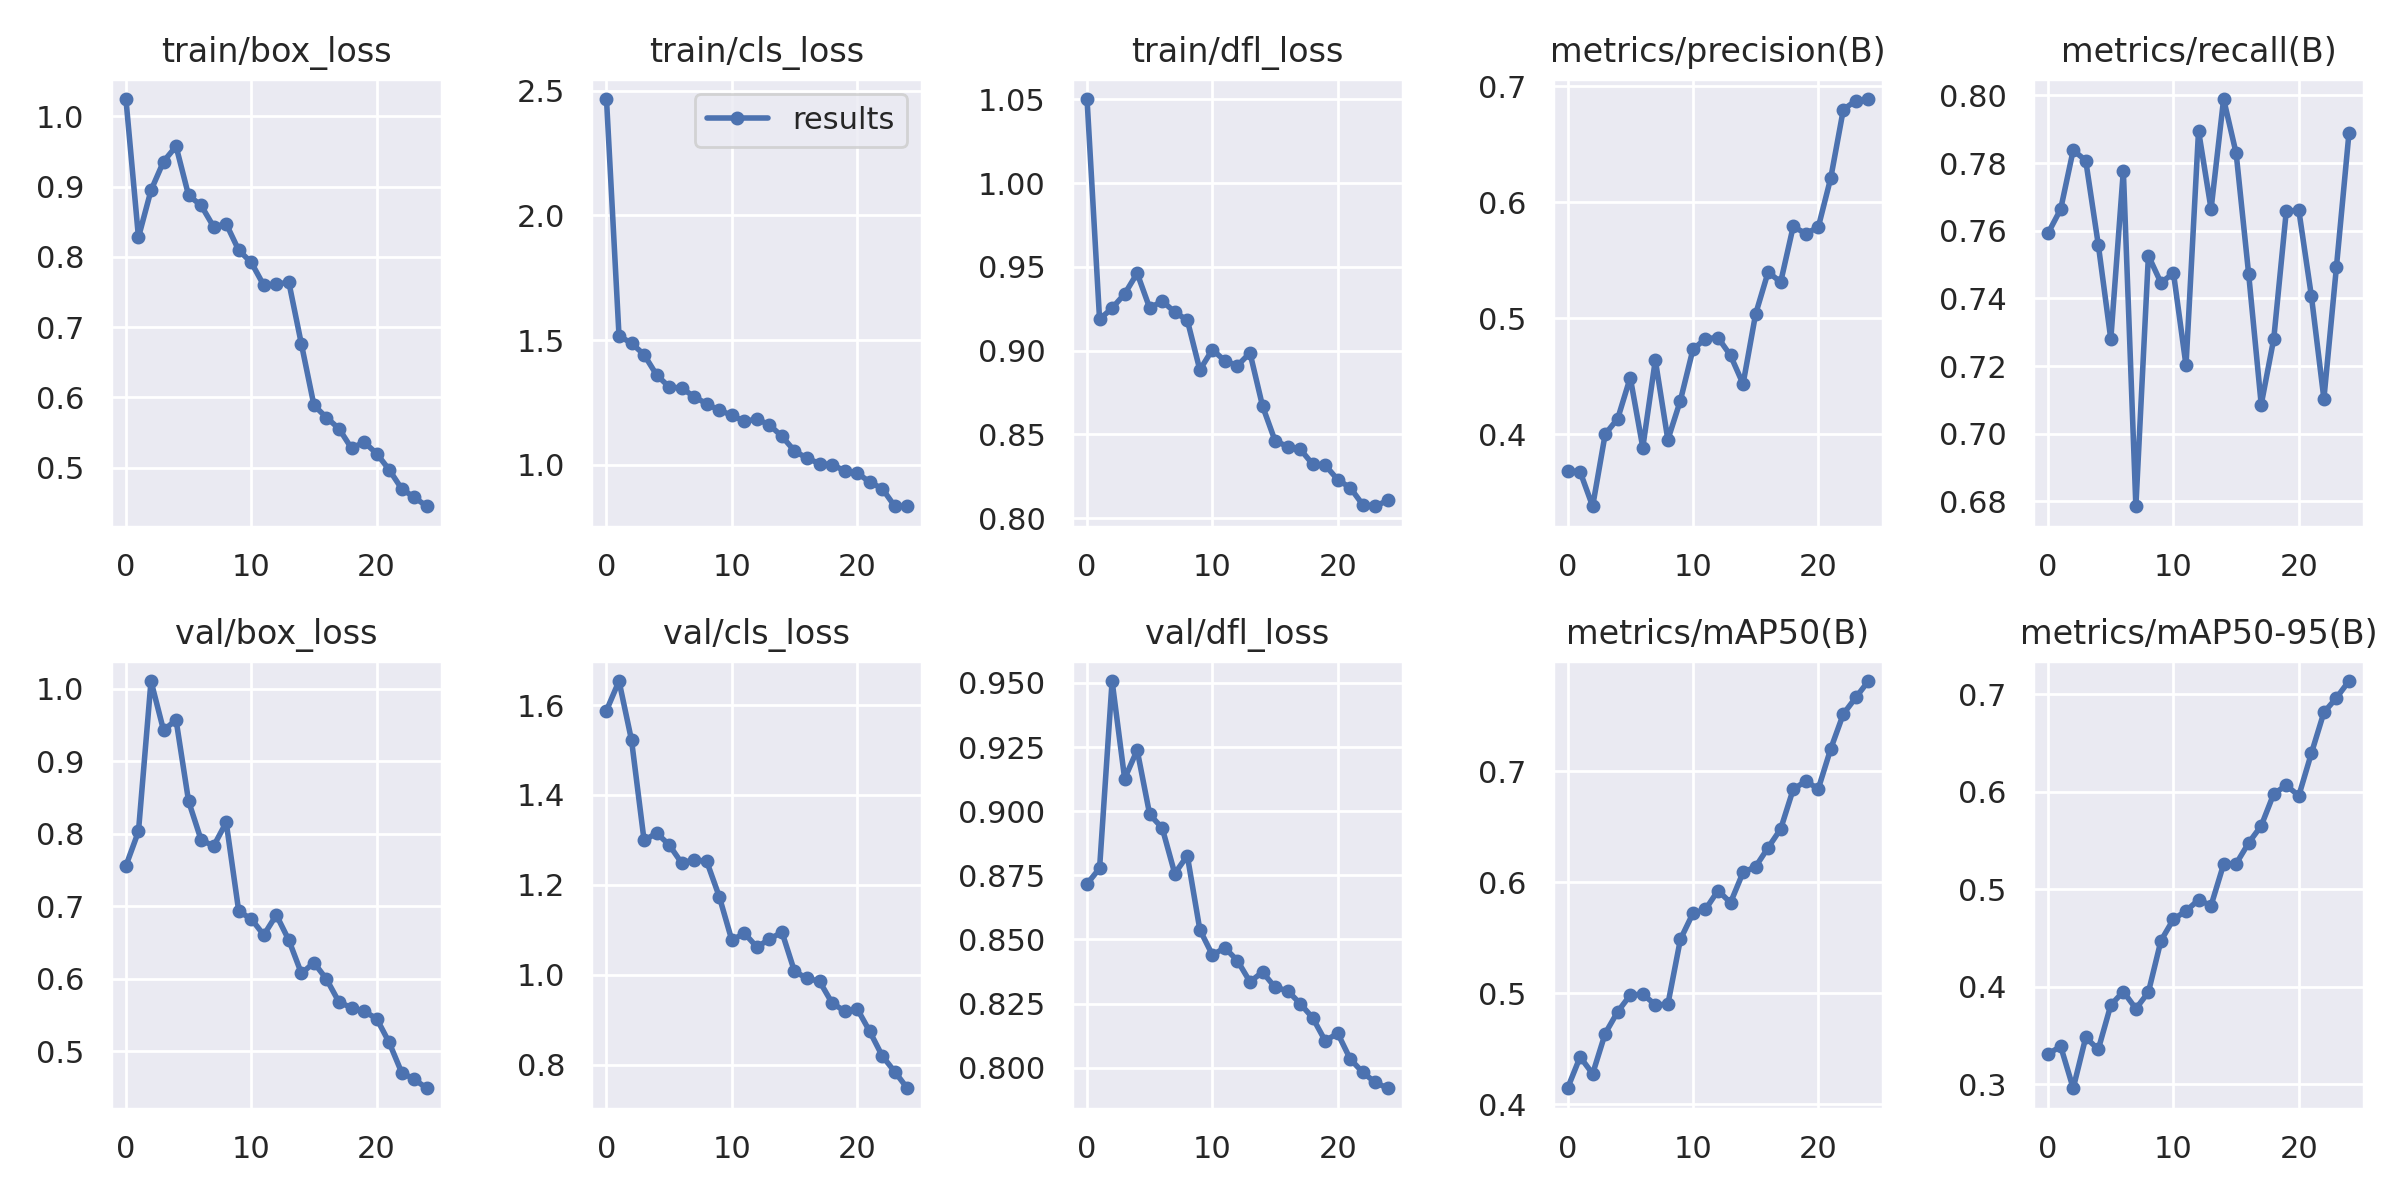

In [18]:
Image(filename='runs/detect/train/results.png', width=600)

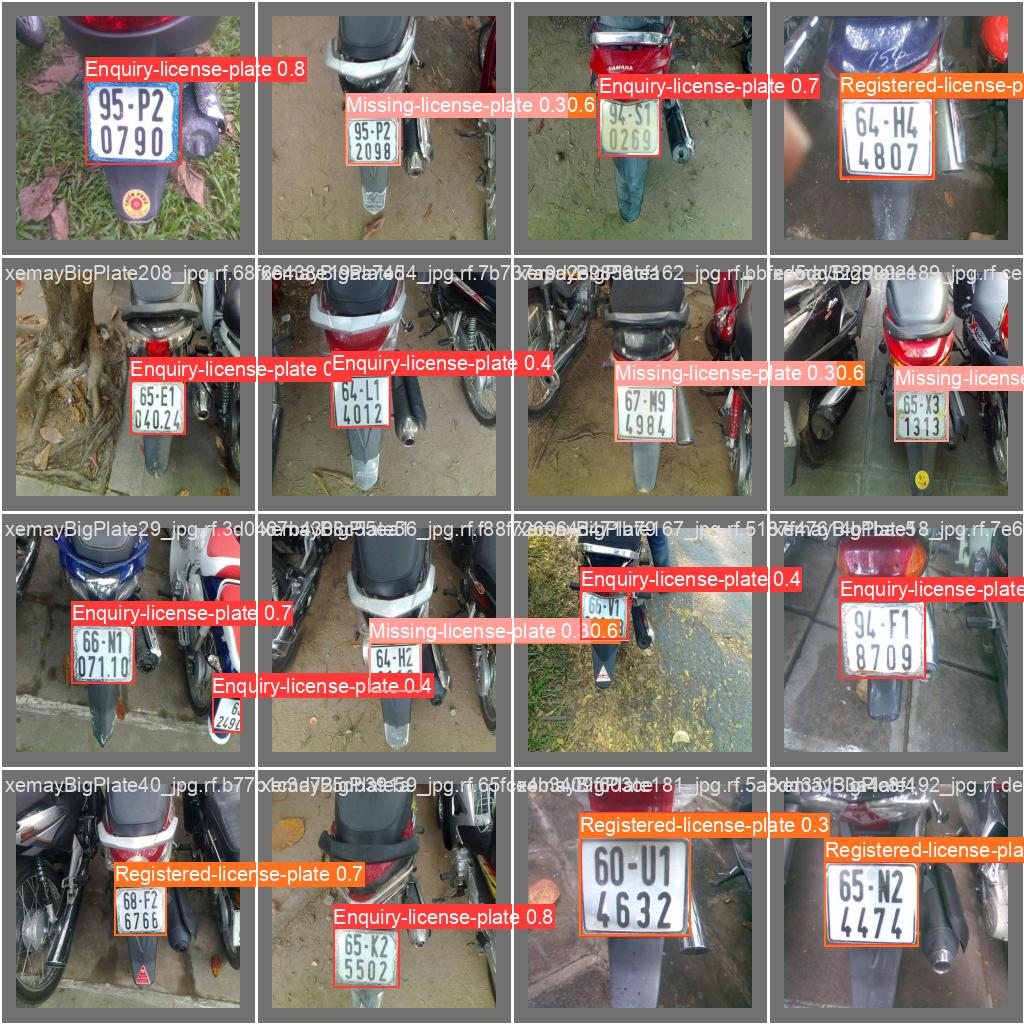

In [19]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [20]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Projectyolo/datayolo.yaml

2024-08-07 17:53:40.958757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 17:53:40.978651: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 17:53:40.984889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 17:53:42.249839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Projectyolo/projectyolodataset/val/l

In [21]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Projectyolo/projectyolodataset/test/images

2024-08-07 17:57:20.791517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 17:57:20.810800: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 17:57:20.817775: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 17:57:22.187489: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/993 /content/drive/MyDrive/Projectyolo/projectyolodataset/test/im

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")
